# 소셜 네트워크 시각화 연습

- networkx 라이브러리를 이용한 네트워크 시각화를 해보자.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt # Interactive display 가능.

### 1. edge 생성

In [2]:
G = nx.Graph() # 비어있는 구조 생성.

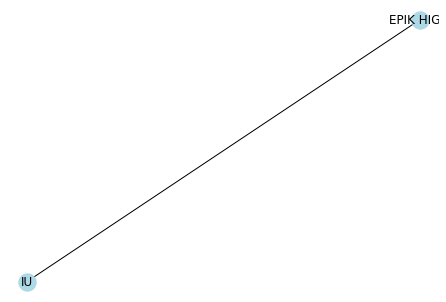

In [3]:
# IU와 EPIK HIGH edge 생성
G.add_edge('IU','EPIK HIGH')
nx.draw(G, with_labels = True, font_weigth = "bold",  node_color='lightblue') # label 보여주기, 폰트 굵게, 노드 색상 lightblue.
plt.show()

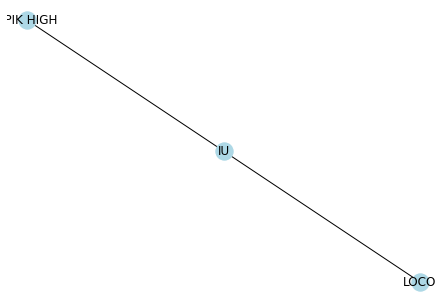

In [4]:
# IU와 LOCO edge 추가
G.add_edge('IU','LOCO')
nx.draw(G, with_labels = True, font_weigth = "bold",  node_color='lightblue')

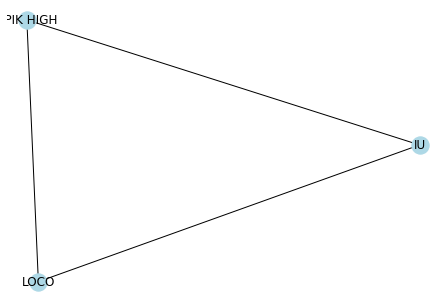

In [5]:
# LOCO와 EPIK HIGH egde 생성
G.add_edge('LOCO','EPIK HIGH')
nx.draw(G, with_labels = True, font_weigth = "bold",  node_color='lightblue')

### 2. edge 삭제

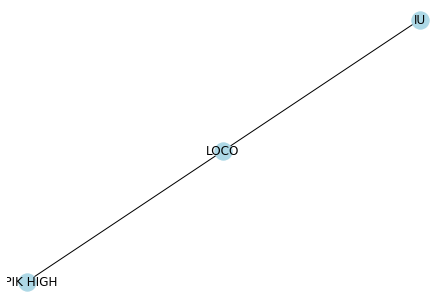

In [6]:
# IU와 EPIK HIGH edge 삭제
G.remove_edge('IU','EPIK HIGH') 
nx.draw(G, with_labels = True, font_weigth = "bold",  node_color='lightblue')

### 3. node 생성

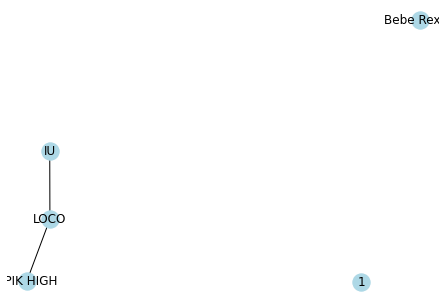

In [7]:
# Bebe Rexga, 1 node 추가
G.add_node("Bebe Rexha")
G.add_node(1)
nx.draw(G, with_labels = True, font_weigth = "bold",  node_color='lightblue')

### 4. node 삭제

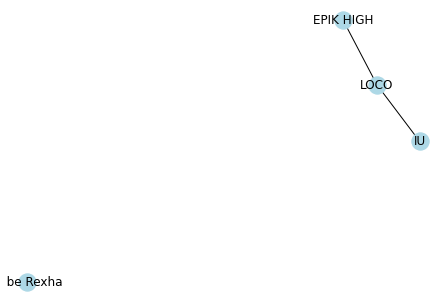

In [8]:
# 1 node 삭제
G.remove_node(1)
nx.draw(G, with_labels = True, font_weigth = "bold",  node_color='lightblue')
#plt.show()

### 5. 방향성 표시

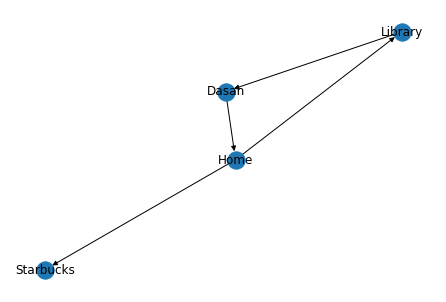

In [9]:
G2 = nx.DiGraph()

G2.add_edges_from([('Dasan', 'Home'), ('Home', 'Starbucks'), ('Home', 'Library'), ('Library', 'Dasan')])

nx.draw(G2, with_labels = True, font_weigth = "bold")
#plt.show()

### 6. 정보 보기

In [10]:
print('nodes :',G.nodes)
print('edges :',G.edges)
print('degree :',G.degree) # 연결된 노드 개수

nodes : ['IU', 'EPIK HIGH', 'LOCO', 'Bebe Rexha']
edges : [('IU', 'LOCO'), ('EPIK HIGH', 'LOCO')]
degree : [('IU', 1), ('EPIK HIGH', 1), ('LOCO', 2), ('Bebe Rexha', 0)]


In [11]:
print(G.adj)
print(G.number_of_nodes())

{'IU': {'LOCO': {}}, 'EPIK HIGH': {'LOCO': {}}, 'LOCO': {'IU': {}, 'EPIK HIGH': {}}, 'Bebe Rexha': {}}
4


In [12]:
#요약된 정보
print(nx.info(G))
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 2
Average degree:   1.0000
Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 4
Average in degree:   1.0000
Average out degree:   1.0000


### 7. Data를 이용한 네트워크 시각화

In [13]:
import pandas as pd

R과 TweeteR로 수집한 관계 데이터를 활용한다.

In [34]:
#csv 읽어오기.
df = pd.read_csv('C:/Users/82106/Documents/TF.csv')

In [35]:
print(df.shape) #데이터 크기 형태
type(df)

(55, 2)


pandas.core.frame.DataFrame

In [36]:
#csv 확인.
df.head(5)

,from,to
0,Sahara95,whitestonedome
1,faviww,whitestonedome
2,joebumbatt,whitestonedome
3,storm000,whitestonedome
4,Dalaidave,whitestonedome


#### 데이터를 edge로 생성.

- networkx.from_pandas_edgelist(data, source=source, target=target) 사용.

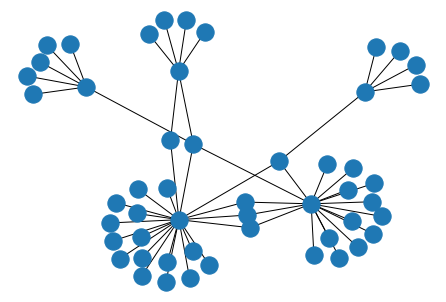

In [37]:
G3 = nx.from_pandas_edgelist(df, source='from', target='to') 
nx.draw(G3, font_weigth = "bold")

### 8. 조금 더 보기 좋은 network를 그려보자.

From에 있는 ID를 모은다.

In [38]:
From = list(df['from'].unique())
From

['Sahara95',
 'faviww',
 'joebumbatt',
 'storm000',
 'Dalaidave',
 'dataentrytard3',
 'FromKorea5',
 'whocares222',
 'jjbutch',
 'gbh9999',
 'discor2',
 'poliesterroca7',
 'kokolabi',
 'CakeAndDish',
 'noxgear',
 'galaz',
 'Normad',
 'Kenal2',
 '3g_router',
 'TOOMUCHTWEETIN',
 'StromTroop77',
 'Toseef96481096',
 'wallpaperbuz23',
 'AnkurSa38476211',
 'KedliNokha',
 'rcgajjar',
 'nhanksbird',
 'amran8886_com',
 'moorecln',
 'mamaG805',
 'tapezilla',
 'pranayw16',
 'vidgamestrailer',
 'gelekdavid',
 'kevinFlavinn',
 'MyBestMattress',
 'StephieGilley',
 'PSSupplies',
 'Dave_SmithCDA',
 'VEGASunlocked',
 'mtjsblog',
 'shopping4free',
 'Deza00060735',
 'DanielWalters2',
 'littlebitsofall',
 'RCChicago']

To에 있는 ID 모은다.

In [39]:
To = list(df['to'].unique())
To

['whitestonedome', 'SaharanGautam', 'faviocoria82', 'joebumbatts', 'storm0415']

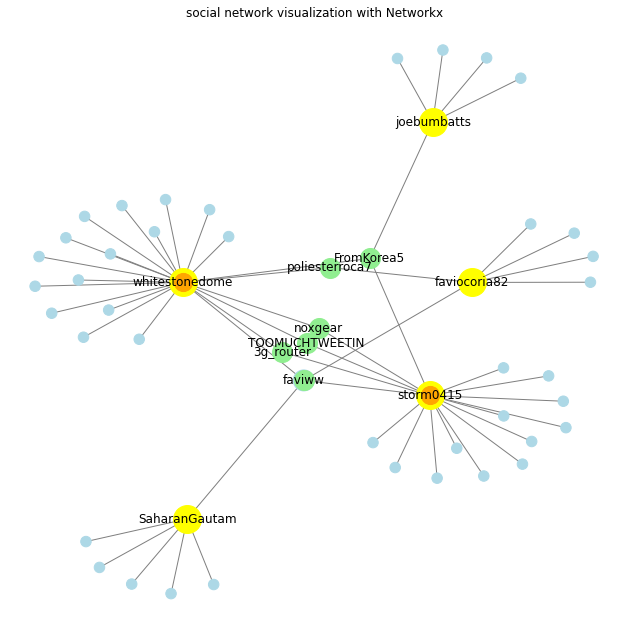

In [55]:
#크기를 정함.
plt.figure(figsize=(11, 11))

# 1. 그래프 생성
g = nx.from_pandas_edgelist(df, source='to', target='from') 

# 2. 레이아웃
layout = nx.spring_layout(g,iterations=50)

# 3. From의 사이즈를 degree 크기 * 80으로 (임의로 정한 것.)
From_size = [g.degree(F) * 110 for F in From]

# 4. From의 node 그리기
nx.draw_networkx_nodes(g, layout, nodelist=From, node_size=From_size, #node size = From_size
                       node_color='lightblue')

# 5. From에서 edge가 2개 이상인 것은 따로 표시.
popular_From = [From for From in From if g.degree(From) >= 2] # degree가 2 이상인 것(edge가 2개 이상인것.)
nx.draw_networkx_nodes(g, layout, nodelist=popular_From, node_color='lightgreen', node_size=400) # edge 2개 이상은 연한 초록으로 표시

# 5. To의 node 그리기. 노란색
nx.draw_networkx_nodes(g, layout, nodelist=To, node_color='yellow', node_size=780) # 

# 6. TO 노드가 8개보다 많으면 가운데 주황색으로 표시
popular_To = [To for To in To if g.degree(To) > 8] # degree가 8 이상인 것만 주황색으로 할 것임.
nx.draw_networkx_nodes(g, layout, nodelist=popular_To, node_color='orange', node_size=330) # 주황색으로

#7. edge를 그린다.
nx.draw_networkx_edges(g, layout, width=1, edge_color="gray")

#To의 label 표시.
node_labels = dict(zip(To, To))
nx.draw_networkx_labels(g, layout, labels=node_labels)

#Popular_From의 label 표시
node_labels_from = dict(zip(popular_From, popular_From))
nx.draw_networkx_labels(g, layout, labels=node_labels_from)

#겉에 선 테두리 없애기.
plt.axis('off')

plt.title("social network visualization with Networkx")
plt.show()

In [60]:
print('- To의 degree :', g.degree(To))
print('- From에서 2 이상의 degree :', g.degree(popular_From))

- To의 degree : [('whitestonedome', 21), ('SaharanGautam', 6), ('faviocoria82', 6), ('joebumbatts', 5), ('storm0415', 17)]
- From에서 2 이상의 degree : [('faviww', 4), ('FromKorea5', 3), ('poliesterroca7', 2), ('noxgear', 2), ('3g_router', 2), ('TOOMUCHTWEETIN', 2)]
